## Driving Map Navigator

在中国大陆 一个人 从任意一个地方出发 我们规划一条比较合理的线路 到另外一个地方

In [7]:
# coding = utf-8

In [312]:
import random
import networkx
import matplotlib.pyplot as plt
%matplotlib inline
print(plt.matplotlib.__path__)

['C:\\ML\\Anaconda\\lib\\site-packages\\matplotlib']


In [313]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [314]:
import re

In [315]:
city_info={}
for line in coordination_source.split('\n'):
    if not line.strip() or line.startswith("//"): continue
        
    city=re.findall("name:'(\w+)'",line)
    x_y=re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)",line)[0]
    x_y=tuple(map(float,x_y))
    city_info[city[0]]=x_y
    #print('\t',city)
    #print('\t',x_y)

print(city_info)

{'兰州': (103.73, 36.03), '嘉峪关': (98.17, 39.47), '西宁': (101.74, 36.56), '成都': (104.06, 30.67), '石家庄': (114.48, 38.03), '拉萨': (102.73, 25.04), '贵阳': (106.71, 26.57), '武汉': (114.31, 30.52), '郑州': (113.65, 34.76), '济南': (117.0, 36.65), '南京': (118.78, 32.04), '合肥': (117.27, 31.86), '杭州': (120.19, 30.26), '南昌': (115.89, 28.68), '福州': (119.3, 26.08), '广州': (113.23, 23.16), '长沙': (113.0, 28.21), '沈阳': (123.38, 41.8), '长春': (125.35, 43.88), '哈尔滨': (126.63, 45.75), '太原': (112.53, 37.87), '西安': (108.95, 34.27), '北京': (116.46, 39.92), '上海': (121.48, 31.22), '重庆': (106.54, 29.59), '天津': (117.2, 39.13), '呼和浩特': (111.65, 40.82), '南宁': (108.33, 22.84), '银川': (106.27, 38.47), '乌鲁木齐': (87.68, 43.77), '香港': (114.17, 22.28), '澳门': (113.54, 22.19)}


In [316]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [317]:
import math
def geo_distance(origin, dest):
    """
    Calculate the Haversine distance.
    """
    lat1,lon1=origin
    lat2,lon2=dest
    radius=6371 # radius of earth km
    dlat=math.radians(lat2-lat1)
    dlon=math.radians(lon2-lon1)
    
    a=(math.sin(dlat/2)*math.sin(dlat/2)+
      math.cos(math.radians(lat1))*math.cos(math.radians(lat2))*
      math.sin(dlon/2)*math.sin(dlon/2))
    c=2*math.atan2(math.sqrt(a),math.sqrt(1-a))
    d=radius*c
    return d

In [318]:
def get_city_dist(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

In [319]:
get_city_dist("北京","武汉")

507.1822625862953

In [320]:
get_city_dist("杭州","上海")

153.5185697155768

In [321]:
# coding = utf-8
from matplotlib.font_manager import FontProperties  
font_song = FontProperties(fname=r"C:\\Windows\\Fonts\\simkai.ttf", size=10)
import networkx as nx

In [322]:
cities=[]
for i in city_info:
    cities.append(i)

cities

['兰州',
 '嘉峪关',
 '西宁',
 '成都',
 '石家庄',
 '拉萨',
 '贵阳',
 '武汉',
 '郑州',
 '济南',
 '南京',
 '合肥',
 '杭州',
 '南昌',
 '福州',
 '广州',
 '长沙',
 '沈阳',
 '长春',
 '哈尔滨',
 '太原',
 '西安',
 '北京',
 '上海',
 '重庆',
 '天津',
 '呼和浩特',
 '南宁',
 '银川',
 '乌鲁木齐',
 '香港',
 '澳门']

## 解决画图中文显示问题
### (具体原因还不明，总之可行)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [323]:
city_graph=nx.Graph()
city_graph.add_nodes_from(cities)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

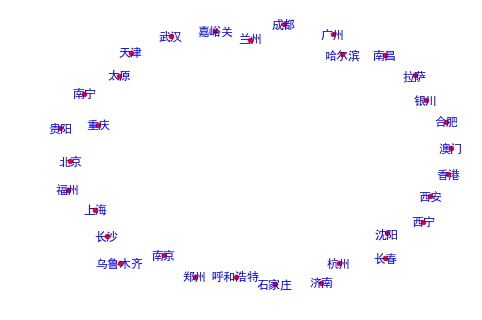

In [324]:
nx.draw(city_graph,node_size=20,with_labels=True,font_color='b')

In [325]:
len(cities)

32

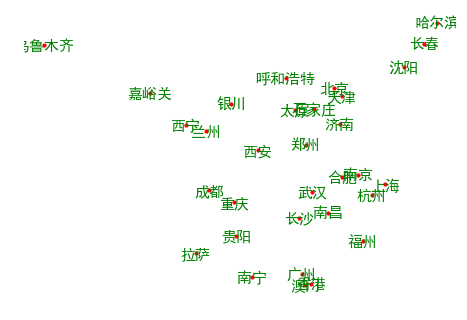

In [326]:
nx.draw(city_graph,city_info,with_labels=True,node_size=10,font_color='g',font_size=15)

In [327]:
get_city_dist("乌鲁木齐","嘉峪关")

1165.8679943488457

In [328]:
get_city_dist('沈阳','北京')

776.4154006857316

In [329]:
from collections import defaultdict

#threhold=300
threhold=700

cities_connect=defaultdict(list)
for c1 in cities:
    for c2 in cities:
        if c1==c2: continue
        if get_city_dist(c1,c2)<threhold:
            cities_connect[c1].append(c2)

In [330]:
cities_connect

defaultdict(list,
            {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '石家庄': ['武汉',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '南昌',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '武汉': ['石家庄',
              '郑州',
              '济南',
              '南京',
              '合肥',
              '杭州',
              '南昌',
              '福州',
              '广州',
              '长沙',
              '太原',
              '西安',
              '北京',
              '天津',
              '呼和浩特',
  

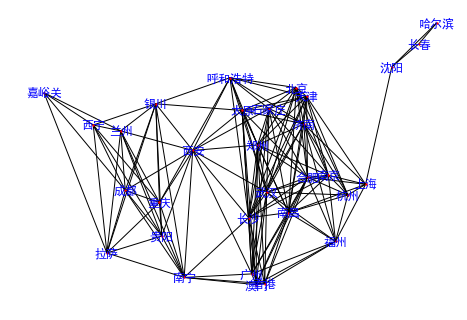

In [331]:
cities_connect_graph=nx.Graph(cities_connect)
nx.draw(cities_connect_graph,city_info,with_labels=True,node_size=2,font_color='b')

In [332]:
get_city_dist("北京","沈阳")

776.4154006857316

In [333]:
def get_successors(front,graph):
    ###you can cut of some elements for customize, means puring leaf
    return graph[front]

In [334]:
get_successors("北京",cities_connect_graph)

AtlasView({'石家庄': {}, '武汉': {}, '郑州': {}, '济南': {}, '南京': {}, '合肥': {}, '杭州': {}, '南昌': {}, '长沙': {}, '太原': {}, '天津': {}, '呼和浩特': {}})

In [335]:
def is_goal(predict):
    def _predict(cond1,cond2):
        return predict(cond1,cond2)
    return _predict

In [336]:
def predicted(node, dest):
    return node == dest

In [337]:
test=is_goal(predicted)
test('A','A')

True

In [338]:
test('A','B')

False

In [339]:
is_goal(predicted)('A','B')

False

In [340]:
is_goal(predicted)('A','A')

True

In [341]:
def search_dest(graph, start, dest, get_successors, is_goal_predict, stratety_func):
    pathes=[[start]]
    seen=set()
    found_pathes=[]
    
    steps_cost=0
    while pathes:
        path=pathes.pop(0)
        front=path[-1]
        if front in seen:continue
        ### recorde steps for stragety evaluate 
        steps_cost+=1
        
        for city in get_successors(front, graph):
            if city in path: continue
            new_path=path+[city]
            
            ###for specific, some nodes may could be ignored base on stratgey
            pathes.append(new_path)
            
            steps_cost+=1
            if is_goal_predict(city,dest):
                #found_pathes.append(new_path)
                print("{} steps cost for finding dest".format(steps_cost))
                return new_path
        pathes=stratety_func(pathes)
        seen.add(front)
    return found_pathes

In [342]:
pathes = [['杭州', '济南'], ['杭州', '南京'], ['杭州', '合肥'], ['杭州', '南昌'], ['杭州', '福州'], ['杭州', '北京'], ['杭州', '上海'], ['杭州', '天津']]

In [343]:
for i in pathes:
    print(get_city_dist(i[0],i[1]))

490.9647966194679
184.57074268172903
335.7362651542952
485.17998762113706
250.88470484756093
655.9367799584198
153.5185697155768
577.8413626643784


In [344]:
def sort_pathes(pathes, func, beam):
    return sorted(pathes,key=func)[:beam]

In [345]:
def get_path_dist(path):
    distance=0
    if len(path)>1:
        for i in range(len(path)-1):
            distance+=get_city_dist(path[i],path[i+1])
    return distance
    

In [346]:
def comprehensive_sort(pathes):
    return sort_pathes(pathes,lambda p:(len(p)+get_path_dist(p)),beam=30)

In [347]:
comprehensive_sort(pathes)

[['杭州', '上海'],
 ['杭州', '南京'],
 ['杭州', '福州'],
 ['杭州', '合肥'],
 ['杭州', '南昌'],
 ['杭州', '济南'],
 ['杭州', '天津'],
 ['杭州', '北京']]

In [348]:

sorted(pathes, key=lambda p:get_path_dist(p),reverse=1)[:1]

[['杭州', '北京']]

In [349]:
get_path_dist(['杭州', '济南', "上海"])

1069.43116321627

In [350]:
get_city_dist("杭州","济南")

490.9647966194679

In [351]:

get_city_dist("济南", "上海")

578.4663665968022

In [352]:
490.9647966194679+578.4663665968022

1069.43116321627

In [353]:
def mini_change_station(pathes):
    return sort_pathes(pathes,lambda p:len(p),beam=-1)

In [354]:
mini_change_station(pathes)

[['杭州', '济南'],
 ['杭州', '南京'],
 ['杭州', '合肥'],
 ['杭州', '南昌'],
 ['杭州', '福州'],
 ['杭州', '北京'],
 ['杭州', '上海']]

In [355]:

def min_dist(pathes):
    return sort_pathes(pathes,lambda p:get_path_dist(p),beam=-1)

In [356]:
sort_pathes(pathes, lambda p: get_path_dist(p), 10)

[['杭州', '上海'],
 ['杭州', '南京'],
 ['杭州', '福州'],
 ['杭州', '合肥'],
 ['杭州', '南昌'],
 ['杭州', '济南'],
 ['杭州', '天津'],
 ['杭州', '北京']]

In [357]:
def most_view(pathes):
    return sort_pathes(pathes,lambda p:-len(p),2)

In [358]:
search_dest(cities_connect_graph,"广州","北京",get_successors,is_goal(predicted),comprehensive_sort)

43 steps cost for finding dest


['广州', '长沙', '北京']

In [359]:
search_dest(cities_connect_graph,"广州","北京",get_successors,is_goal(predicted),most_view)

24 steps cost for finding dest


['广州', '石家庄', '北京']

In [360]:
search_dest(cities_connect_graph,"广州","嘉峪关",get_successors,is_goal(predicted),mini_change_station)

254 steps cost for finding dest


['广州', '西安', '兰州', '嘉峪关']

In [361]:
search_dest(cities_connect_graph,"广州","北京",get_successors,is_goal(predicted),most_view)

24 steps cost for finding dest


['广州', '石家庄', '北京']

In [362]:
sort_pathes(search_all_routes(cities_connect_graph,'北京','南宁'), lambda p: get_path_dist(p), 100)

10


[['北京', '长沙', '南宁'],
 ['北京', '石家庄', '西安', '南宁'],
 ['北京', '石家庄', '西安', '贵阳', '南宁'],
 ['北京', '石家庄', '广州', '南宁'],
 ['北京', '武汉', '澳门', '南宁'],
 ['北京', '武汉', '香港', '南宁'],
 ['北京', '呼和浩特', '重庆', '南宁'],
 ['北京', '太原', '银川', '南宁'],
 ['北京', '石家庄', '西安', '成都', '南宁'],
 ['北京', '石家庄', '西安', '兰州', '南宁']]

In [363]:
get_successors('嘉峪关',cities_connect_graph)

AtlasView({'兰州': {}, '西宁': {}, '成都': {}, '拉萨': {}})

In [364]:
search_all_routes(cities_connect_graph,'西宁','南宁')

9


[['西宁', '兰州', '南宁'],
 ['西宁', '成都', '南宁'],
 ['西宁', '拉萨', '南宁'],
 ['西宁', '贵阳', '南宁'],
 ['西宁', '重庆', '南宁'],
 ['西宁', '银川', '南宁'],
 ['西宁', '兰州', '西安', '南宁'],
 ['西宁', '兰州', '西安', '广州', '南宁'],
 ['西宁', '兰州', '西安', '长沙', '南宁']]

In [365]:
search_all_routes(cities_connect_graph,'北京','广州')

12


[['北京', '石家庄', '广州'],
 ['北京', '武汉', '广州'],
 ['北京', '郑州', '广州'],
 ['北京', '合肥', '广州'],
 ['北京', '南昌', '广州'],
 ['北京', '长沙', '广州'],
 ['北京', '太原', '广州'],
 ['北京', '石家庄', '西安', '广州'],
 ['北京', '武汉', '福州', '广州'],
 ['北京', '武汉', '香港', '广州'],
 ['北京', '武汉', '澳门', '广州'],
 ['北京', '长沙', '南宁', '广州']]

## TODO summary
### 1 shortest path first
### 2 A*
### 3 farest path first
### 4 puring/beam just search part of points
### 5 all routes search with BFS/DFS

In [366]:
graphA={
    'A': ['B','C'],
    'B': ['A','C'],
    'C': ['B','A']
}

## N个结点的完全图，任意两点间的所有路径数
- 1+(n-2)+(n-2)(n-3)+(n-2)(n-3)(n-4)+...(n-2)(n-3)(n-4)(n-5)..1
- 两点间只有1条边的路径只有1种，两点间只有2条边的路径有(n-2)种走法，以此类推，两点间有n-1条边的情况有(n-2)!种走法

### $\sum_{i=0}^{n-2}\frac{(n-2)!}{i!}$

In [367]:
from functools import reduce

### N!#####
def Fj(n):
    if n<=1:return 1
    return n*Fj(n-1)

### the Numbers of all routes between any two points in a N nodes complete Graph########
def F_all(n):
    if n<=2:return 1
    n_2_f=Fj(n-2)
    #print(n_2_f)
    Sum=0
    for i in range(0,n-1):
        item=n_2_f//Fj(i)
        #print(item,n_2_f,Fj(i))
        Sum+=item
    return Sum


In [368]:
F_all(9)

13700

In [369]:
def createNodeList(n):
    lis=[]
    for k in range(n):
        li=[]
        for i in range(n):
    #print(chr(i+ord('A')))
            if i==k:continue
            li.append(chr(i+ord('A')))
        lis.append(li)
    return lis

In [370]:
createNodeList(4)

[['B', 'C', 'D'], ['A', 'C', 'D'], ['A', 'B', 'D'], ['A', 'B', 'C']]

In [371]:
def produceCompleteGrahp(n):
    List=createNodeList(n)
    graph={}
    i=0
    for item in List:
        graph[chr(i+ord('A'))]=item
        i=i+1
    return graph

In [372]:
produceCompleteGrahp(4)

{'A': ['B', 'C', 'D'],
 'B': ['A', 'C', 'D'],
 'C': ['A', 'B', 'D'],
 'D': ['A', 'B', 'C']}

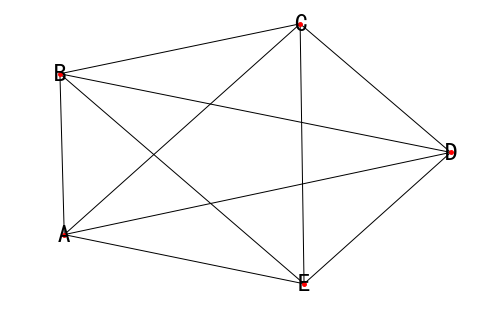

In [373]:
nx.draw(nx.Graph(produceCompleteGrahp(5)),with_labels=True,node_size=15, font_size=25)

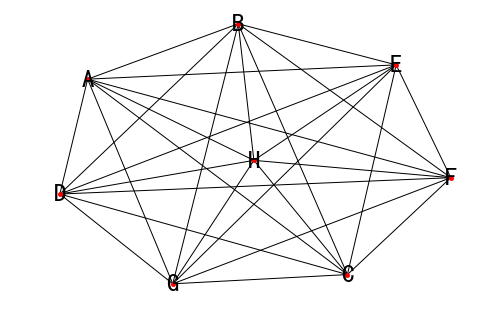

In [374]:
nx.draw(nx.Graph(produceCompleteGrahp(8)),with_labels=True,node_size=15, font_size=25)

In [375]:
def search_all_routes(graph, start, dest, seenExclude=False):
    pathes=[[start]]
    if not seenExclude:
        seen=set()
    AllRoutes=[]
    
    while pathes:
        path=pathes.pop(0)
        front=path[-1]
        if not seenExclude:
            if front in seen: continue 
        new_path=[]
        
        ###孤立结点异常handle
        try:
            graph[front]
        except:
            return AllRoutes
        
        for nexts in graph[front]:
            if nexts in path:continue
            new_path=path+[nexts]
            pathes.append(new_path)
            if nexts==dest: AllRoutes.append(new_path) 
    
        if not seenExclude:
            seen.add(front)
    print(len(AllRoutes))
    return AllRoutes

In [376]:
search_all_routes(produceCompleteGrahp(6),'A','B')

5


[['A', 'B'],
 ['A', 'C', 'B'],
 ['A', 'D', 'B'],
 ['A', 'E', 'B'],
 ['A', 'F', 'B']]

In [377]:
search_all_routes(produceCompleteGrahp(6),'A','B',seenExclude=True)

65


[['A', 'B'],
 ['A', 'C', 'B'],
 ['A', 'D', 'B'],
 ['A', 'E', 'B'],
 ['A', 'F', 'B'],
 ['A', 'C', 'D', 'B'],
 ['A', 'C', 'E', 'B'],
 ['A', 'C', 'F', 'B'],
 ['A', 'D', 'C', 'B'],
 ['A', 'D', 'E', 'B'],
 ['A', 'D', 'F', 'B'],
 ['A', 'E', 'C', 'B'],
 ['A', 'E', 'D', 'B'],
 ['A', 'E', 'F', 'B'],
 ['A', 'F', 'C', 'B'],
 ['A', 'F', 'D', 'B'],
 ['A', 'F', 'E', 'B'],
 ['A', 'C', 'D', 'E', 'B'],
 ['A', 'C', 'D', 'F', 'B'],
 ['A', 'C', 'E', 'D', 'B'],
 ['A', 'C', 'E', 'F', 'B'],
 ['A', 'C', 'F', 'D', 'B'],
 ['A', 'C', 'F', 'E', 'B'],
 ['A', 'D', 'C', 'E', 'B'],
 ['A', 'D', 'C', 'F', 'B'],
 ['A', 'D', 'E', 'C', 'B'],
 ['A', 'D', 'E', 'F', 'B'],
 ['A', 'D', 'F', 'C', 'B'],
 ['A', 'D', 'F', 'E', 'B'],
 ['A', 'E', 'C', 'D', 'B'],
 ['A', 'E', 'C', 'F', 'B'],
 ['A', 'E', 'D', 'C', 'B'],
 ['A', 'E', 'D', 'F', 'B'],
 ['A', 'E', 'F', 'C', 'B'],
 ['A', 'E', 'F', 'D', 'B'],
 ['A', 'F', 'C', 'D', 'B'],
 ['A', 'F', 'C', 'E', 'B'],
 ['A', 'F', 'D', 'C', 'B'],
 ['A', 'F', 'D', 'E', 'B'],
 ['A', 'F', 'E', 'C', '

In [381]:
F_all(9)

13700

In [379]:
F_all(10)

109601

In [382]:
F_all(20)

17403456103284421

In [383]:
F_all(32)

721032028774273509017636384693701